In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

In [5]:
data=np.array([[3,4],[2,8],[6,9],[10,12]])

In [7]:
data=pd.DataFrame(data,columns=["col1","col2"])

In [8]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


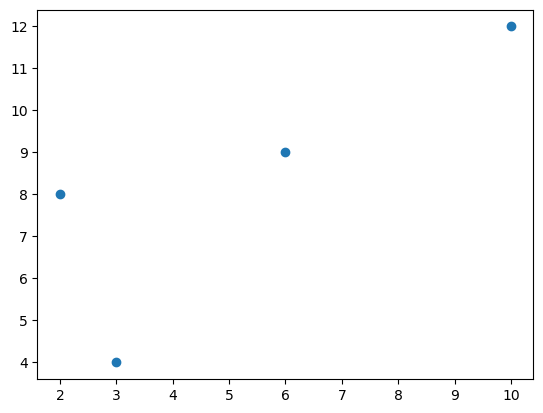

In [9]:
plt.scatter(data["col1"],data["col2"])

In [ ]:
1. standarization of the data
2. cov matrix
3. eig vaulue and eig vector
4. find principle component

In [10]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


In [16]:
meanbycol=np.mean(data,axis=0)

In [19]:
meanbycol

col1    5.25
col2    8.25
dtype: float64

In [17]:
stdbycol=np.std(data,axis=0)

In [20]:
scaled_by_mean=data-meanbycol

In [22]:
scaled_data=scaled_by_mean/stdbycol

In [23]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [24]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [25]:
scaler.fit_transform(data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [29]:
#cov matrix
cov_mat=np.cov(scaled_data.T)

In [28]:
#step-3 eig value and eigen vector

In [31]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [32]:
eig_val

array([2.40938985, 0.25727682])

In [33]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [34]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [36]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [37]:
from sklearn.decomposition import PCA
pca=PCA()

In [38]:
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [39]:
pd.DataFrame(data=pca.fit_transform(scaled_data),columns=["pc1","pc2"])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [40]:
#pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [41]:
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [42]:
0.90352119+0.09647881

1.0

In [44]:
df=pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [45]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [48]:
df=df.drop(['Id number','Type of glass'],axis=1)

In [49]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
scaled_df=scaler.fit_transform(df)

In [54]:
scaled_df

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [56]:
scaled_df=pd.DataFrame(scaled_df,columns=df.columns)

In [57]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [53]:
from sklearn.decomposition import PCA
pca=PCA()

In [59]:
pc_df=pca.fit_transform(scaled_df)

In [68]:
pc_df.head()

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315


In [61]:
pc_df=pd.DataFrame(data=pc_df)

In [64]:
var=pca.explained_variance_ratio_

In [65]:
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [66]:
max(var)

0.27901819179456466

In [67]:
min(var)

0.00017875753590172584

In [69]:
sum(var)

1.0

In [78]:
sorted(var,reverse=True)

[0.27901819179456466,
 0.22778579831670384,
 0.1560937771094047,
 0.12865138291980246,
 0.10155580523615625,
 0.05862613252208689,
 0.040995382590555844,
 0.007094771974823594,
 0.00017875753590172584]

In [75]:
sum(sorted(var,reverse=True)[:6])*100

95.17310878987189

In [74]:
sum(sorted(var,reverse=True)[:5])*100

89.3104955376632

In [76]:
sum(sorted(var,reverse=True)[:7])*100

99.27264704892748

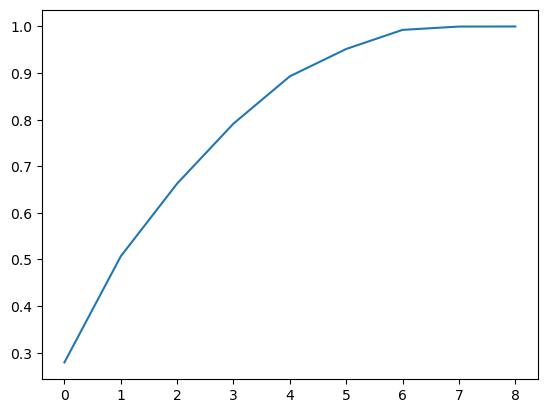

In [77]:
plt.plot(np.cumsum(var))
plt.show()

In [79]:
pca2=PCA(n_components=6)

In [83]:
pd.DataFrame(pca2.fit_transform(scaled_df),columns=["pc1","pc2","pc3","pc4","pc5","pc6"])

,pc1,pc2,pc3,pc4,pc5,pc6
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352
